<a href="https://colab.research.google.com/github/Jalalbaim/K-Means-from-scratch/blob/main/Kmeans_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means algorithm from scratch**
***
BAIM MOHAMED
***
On va essayer d'implémenter l'algorithme de classification KMeans from scratch

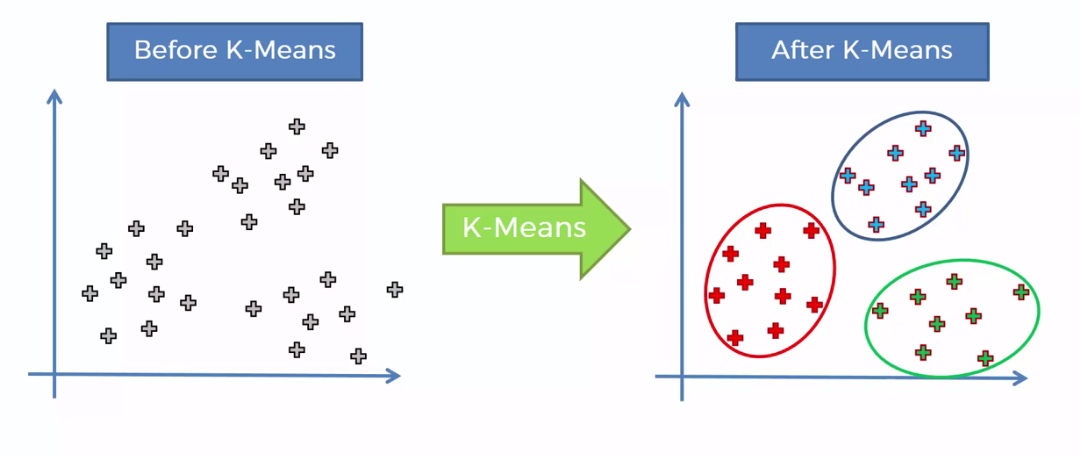

## **Principe algorithmique**

Algorithme K-means

Entrée :

- K le nombre de cluster à former

- Matrice de données

***DEBUT***

Choisir aléatoirement K points (une ligne de la matrice de données). Ces points sont les centres des clusters (nommé centroïd).

    
    REPETER

    Affecter chaque point (élément de la matrice de donnée) au groupe dont il est le plus proche au son centre

    Recalculer le centre de chaque cluster  et modifier le centroide

    JUSQU'A     CONVERGENCE OU (stabilisation de l’inertie totale de la population)

***FIN ALGORITHME***

## **Implémentation**

In [14]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# distance euclidienne

def euclidean_distance(x1, x2):
    ndg1 = x1[0]
    ndg2 = x2[0]
    return np.abs(ndg1 - ndg2)

In [16]:
# Algorithm
max_iterations = 100

def kmeans (data, k):
    # initialisation aléatoire des centroids
    centroids = data[:, np.random.choice(range(data.shape[1]), k, replace=False)].T

    for i in range(1000):
      # association de chaque point à un cluster
        clusters = [[] for _ in range(k)]
        for point in data.T:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

      # associer de nouveau centroids au median des point à chaque cluster
        new_centroids = [np.mean(cluster, axis=0) if cluster else centroid for cluster, centroid in zip(clusters, centroids)]

      # Check pour la convergence
        if np.all(np.array(new_centroids) == np.array(centroids)):
          break
        centroids = new_centroids
    return centroids, clusters

## **Test**
Le test portera sur l'exemple de cours page 38, qui gère le nombre de pixelt en fonction du Ndg

In [17]:
data = np.array([[20,23,26,30,32,34,35,37,38,39,40,42,43,45,46,47,48,50],
                 [15,8,50,17,6,4,100,80,20,10,5,4,1,80,60,60,25,5]])
print(data)

[[ 20  23  26  30  32  34  35  37  38  39  40  42  43  45  46  47  48  50]
 [ 15   8  50  17   6   4 100  80  20  10   5   4   1  80  60  60  25   5]]


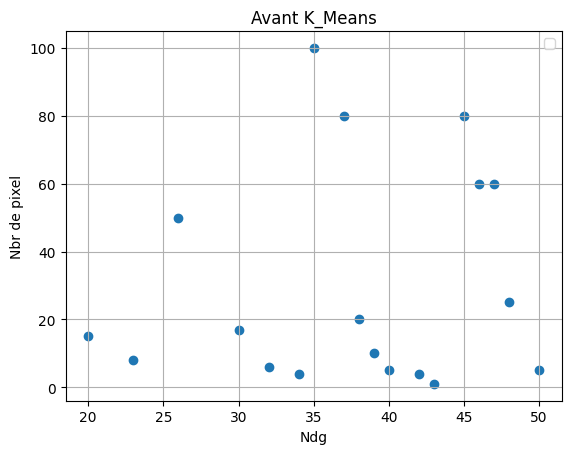

In [18]:
plt.scatter(data[0],data[1], marker='o')
plt.title('Avant K_Means')
plt.xlabel('Ndg')
plt.ylabel('Nbr de pixel')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Application de l'algorithm

k = 3  # Nb de class

# Application de l'algo
centroids, clusters = kmeans(data, k)


In [20]:
for i, centroid in enumerate(centroids):
    print(f"Cluster {i + 1} Centroid: {centroid}")
    print(f"Cluster {i + 1} Size: {len(clusters[i])}")

Cluster 1 Centroid: [26.2 19.2]
Cluster 1 Size: 5
Cluster 2 Centroid: [37.85714286 31.85714286]
Cluster 2 Size: 7
Cluster 3 Centroid: [46.5 38.5]
Cluster 3 Size: 6


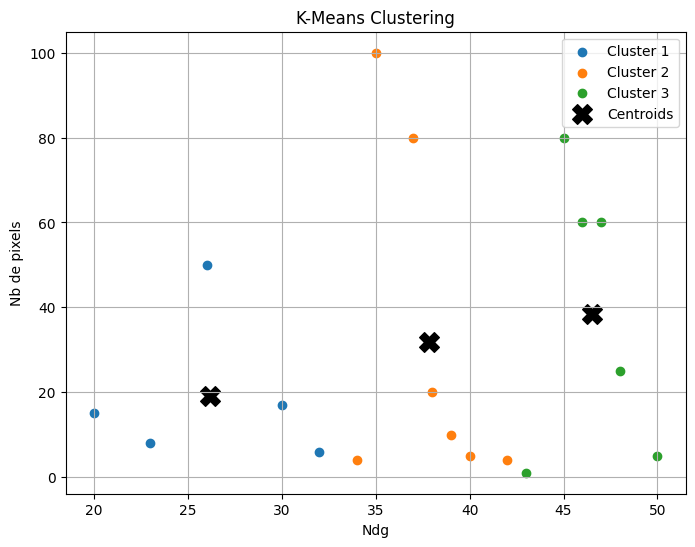

In [21]:
plt.figure(figsize=(8, 6))
# Plot data points
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i + 1}')

# Plot cluster centroids
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Ndg')
plt.ylabel('Nb de pixels')
plt.legend()
plt.grid(True)
plt.show()

## Comparaison avec l'algo prédéfini sur scikit Learn

In [22]:
from sklearn.cluster import KMeans

In [27]:
n_class = 3

kmean = KMeans(n_class)

data = data.T

kmean.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
cluster_assignments = kmean.labels_
cluster_centers = kmean.cluster_centers_

print("Cluster Assignments:")
print(cluster_assignments)

print("\nCluster Centers:")
print(cluster_centers)

Cluster Assignments:
[1 1 0 1 1 1 2 2 1 1 1 1 1 2 0 0 1 1]

Cluster Centers:
[[39.66666667 56.66666667]
 [36.58333333 10.        ]
 [39.         86.66666667]]


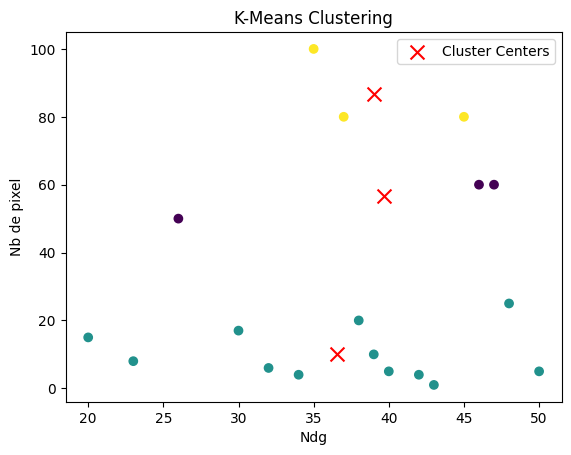

In [29]:
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Ndg')
plt.ylabel('Nb de pixel')
plt.title('K-Means Clustering')
plt.legend()
plt.show()